# Likelihood(MLE와 MAP)



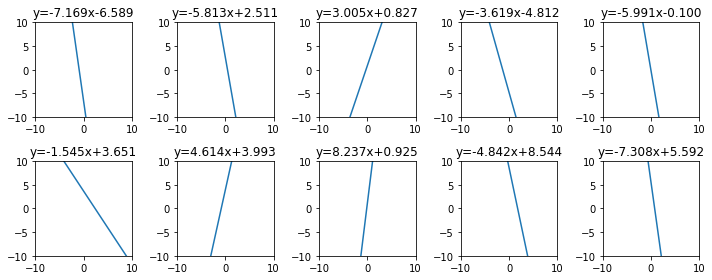

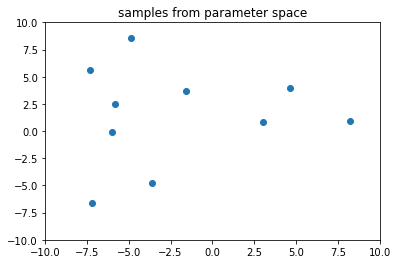

In [1]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

## 사전 확률, 가능도, 사후 확률(prior, likelihood, posterior)

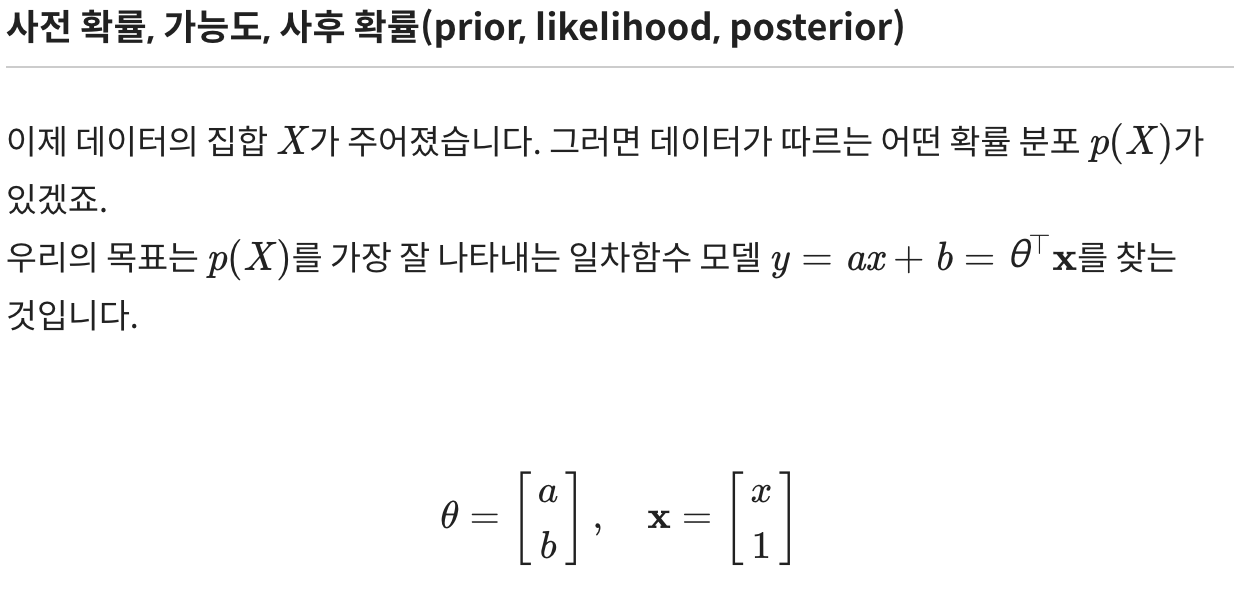

### prior
데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포 p(θ)를 **prior**(prior probability, **사전 확률**)

### likelihood
만약 prior 분포를 고정시킨다면, 주어진 파라미터 분포에 대해서 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산할 수 있습니다.  
이것을 나타내는 값이 **likelihood**(**가능도**, 우도)  

식으로 나타내면, p(X=x∣θ) 즉, 파라미터의 분포 p(θ)가 정해졌을 때 x라는 데이터가 관찰될 확률이죠.  

likelihood가 θ에 의해 결정되는 함수라는 것을 강조하기 위해서 가능도 함수를 L(θ∣x)로 표기하기도 합니다.  

#### MLE
데이터들의 likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법을 **최대 가능도 추정**(maximum likelihood estimation, **MLE**)

### posterior
반대로, 데이터 집합 X가 주어졌을 때 파라미터 θ의 분포 p(θ∣X)를 생각해볼 수 있습니다.

이 값을 '데이터를 관찰한 후 계산되는 확률'이라는 뜻에서 **posterior**(posterior probability, **사후 확률**)라고 부릅니다.

#### MAP
posterior를 최대화하는 방향으로 모델을 학습시키는 방법을 **최대 사후 확률 추정**(maximum a posteriori estimation, **MAP**)

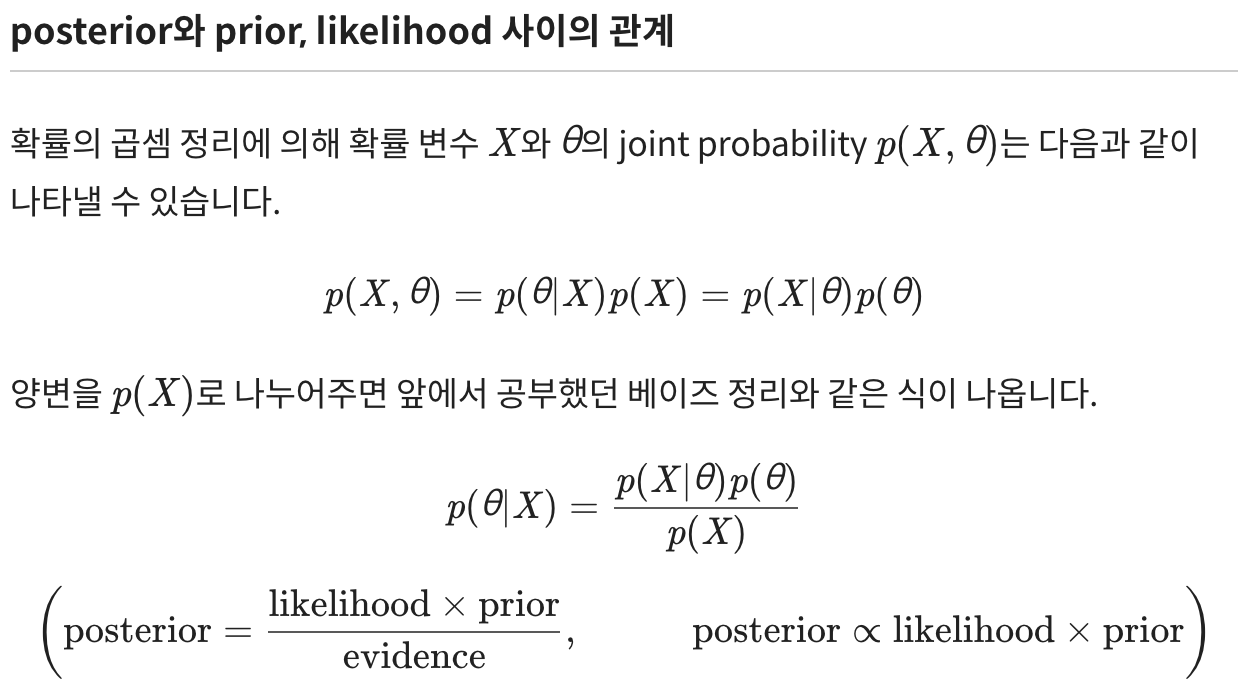

데이터가 따르는 정확한 확률분포 p(X)를 알 수 없어서, posterior p(θ∣X)의 값도 직접 구할 수 없습니다.  
우변의 식에서도 p(X)로 나누는 부분이 있기 때문에 이 식으로도 값을 계산할 수는 없습니다.  
다만 여기에서 p(X)는 고정된 값이고 (데이터가 바뀌지는 않으니) likelihood와 prior는 계산이 가능하기 때문에 우변을 최대화하는 파라미터 값은 구할 수 있는 것입니다.

## likelihood 감 잡기

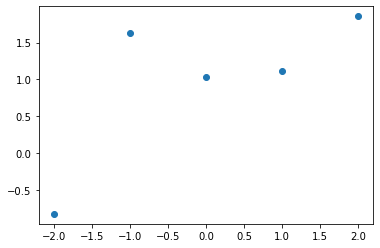

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

아래 코드에서 일차함수 모델의 식을 바꾸어가며 데이터 포인트 5개의 likelihood 값이 각각 어떻게 바뀌는지 살펴봅시다.  

노이즈 분포의 표준편차는 데이터의 실제 분포와 관련된 값이라 우리가 알 수 없지만, 다음 스텝에서 공부할 MLE를 사용하면 표준편차를 알지 못해도 최적의 파라미터 값을 찾을 수 있습니다.  

예제에서는 계산을 위해 표준편차를 0.1로 잡았습니다.

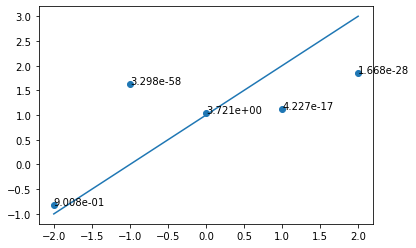

In [10]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

# 데이터 포인트 옆에 있는 숫자는 likelihood 값이고, 직선은 모델이 표현하는 함수의 그래프입니다.

## MLE 최적해 구하기

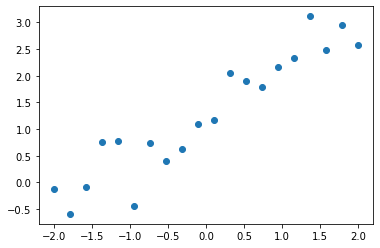

In [11]:
# 데이터셋 생성
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
# y = x + 1, 평균 0, 표준편차 0.5
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

### likelihood 파라미터 계산
데이터를 관찰하고 모델을 설계하는 입장에서는 노이즈의 원래 표준편차를 알 수 없습니다. 노이즈의 표준편차를 0.1로 가정했다고 합시다.  

likelihood와 negative log likelihood는 다음과 같이 계산됩니다.
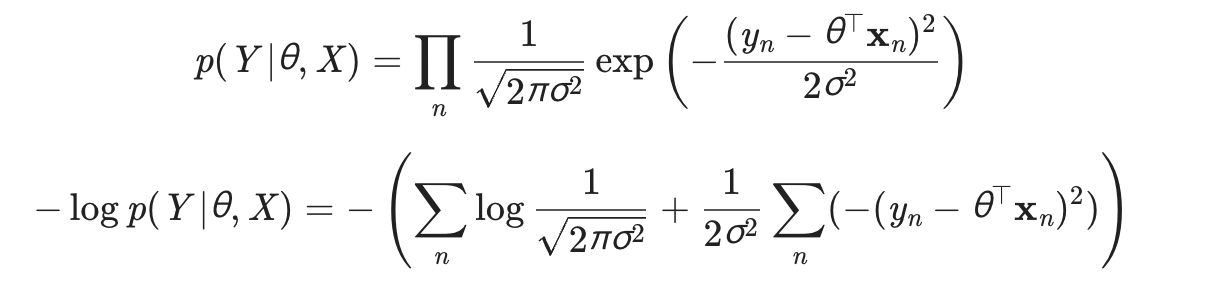

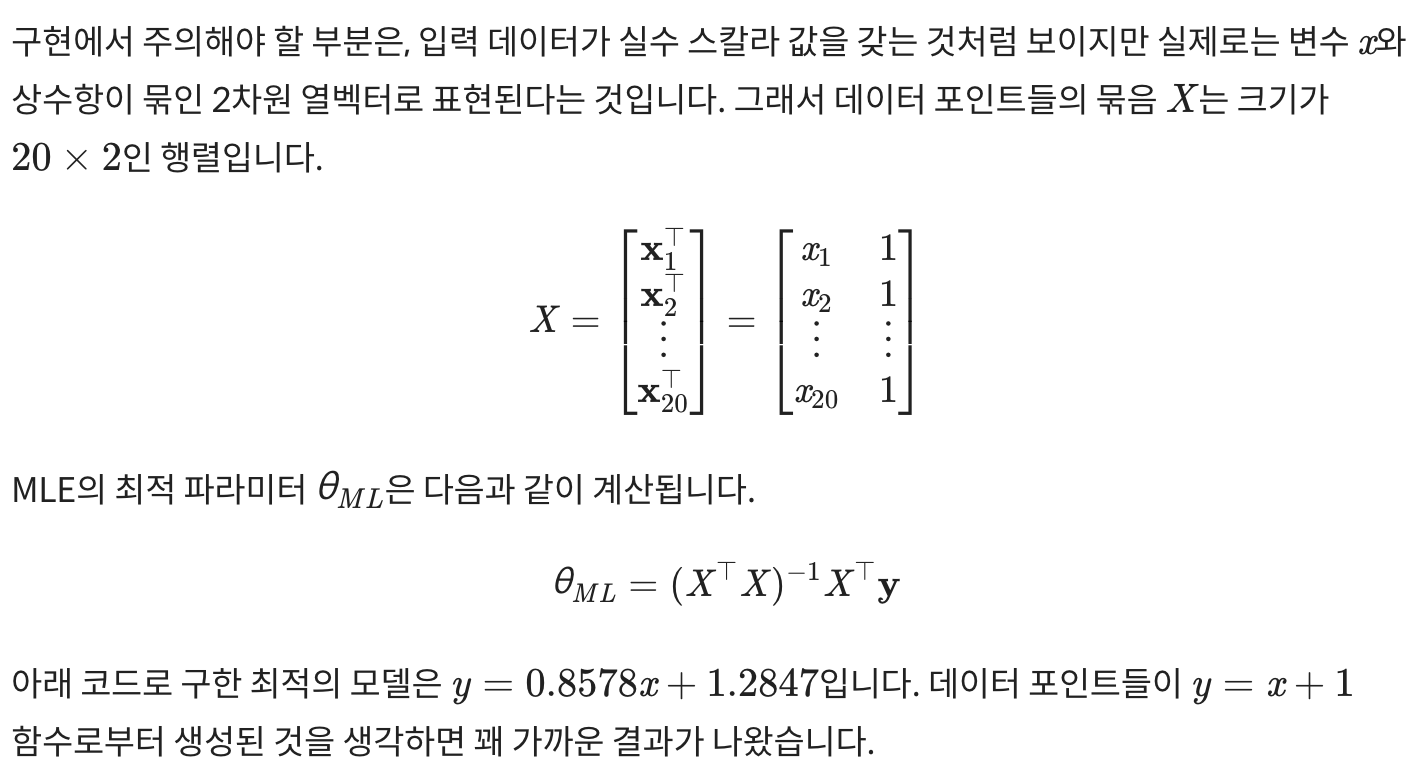

MLE의 최적해는 오로지 관측된 데이터 값에만 의존 한다는 사실

In [12]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


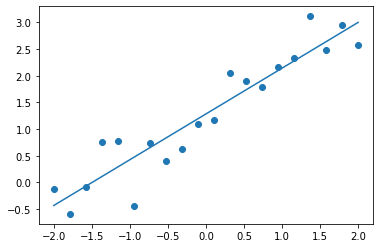

In [13]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

## MLE와 MAP의 비교

MAP는 MLE와 비슷하지만 정규화 항에 해당하는 negative log prior 부분이 존재한다는 차이가 있었습니다. 그래서 MLE 모델보다 MAP 모델이 더 안정적이라는 이야기를 했었죠.  
이상치(outlier)가 있는 데이터셋을 이용해서 MAP와 MLE를 비교해보도록 하겠습니다.


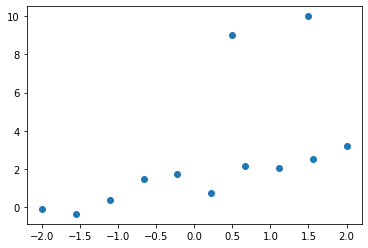

In [14]:
# 데이터셋 생성
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

### 파라미터 계산
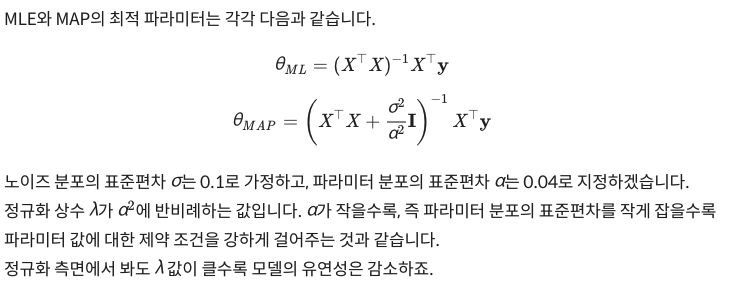

In [15]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


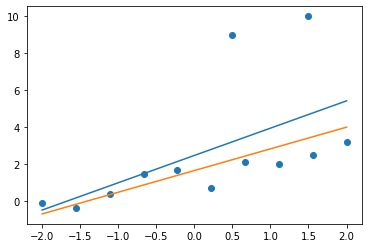

In [16]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

위 그래프에서 파란색 직선과 주황색 직선은 각각 MLE, MAP를 이용해 찾은 모델을 나타냅니다.  

파란색 직선은 이상치 데이터까지 포함한 negative log likelihood를 감소시키기 위해 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서는 약간 벗어났습니다.  
반면 주황색 직선은 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지는 않고 있습니다.

원래 데이터 분포에서 멀리 떨어진 이상치 데이터가 추가되었기 때문에, likelihood의 값은 언더플로우가 발생해서 0으로 표시됩니다.  

negative log likelihood의 값을 보면 MLE 결과와 MAP 결과를 비교할 수 있습니다.  
MAP가 MLE에 비해 negative log likelihood 값이 크지만(likelihood가 작지만), 이상치 데이터가 추가되었을 때 모델 파라미터의 변화는 MLE보다 작습니다.